# Generate 20 Watts-Strogatz graphs by fixing the number of nodes, n = 100 and varying the values of k ( = 4,6,8,10) and p ( = 0, 0.25, 0.5, 0.75, 1).

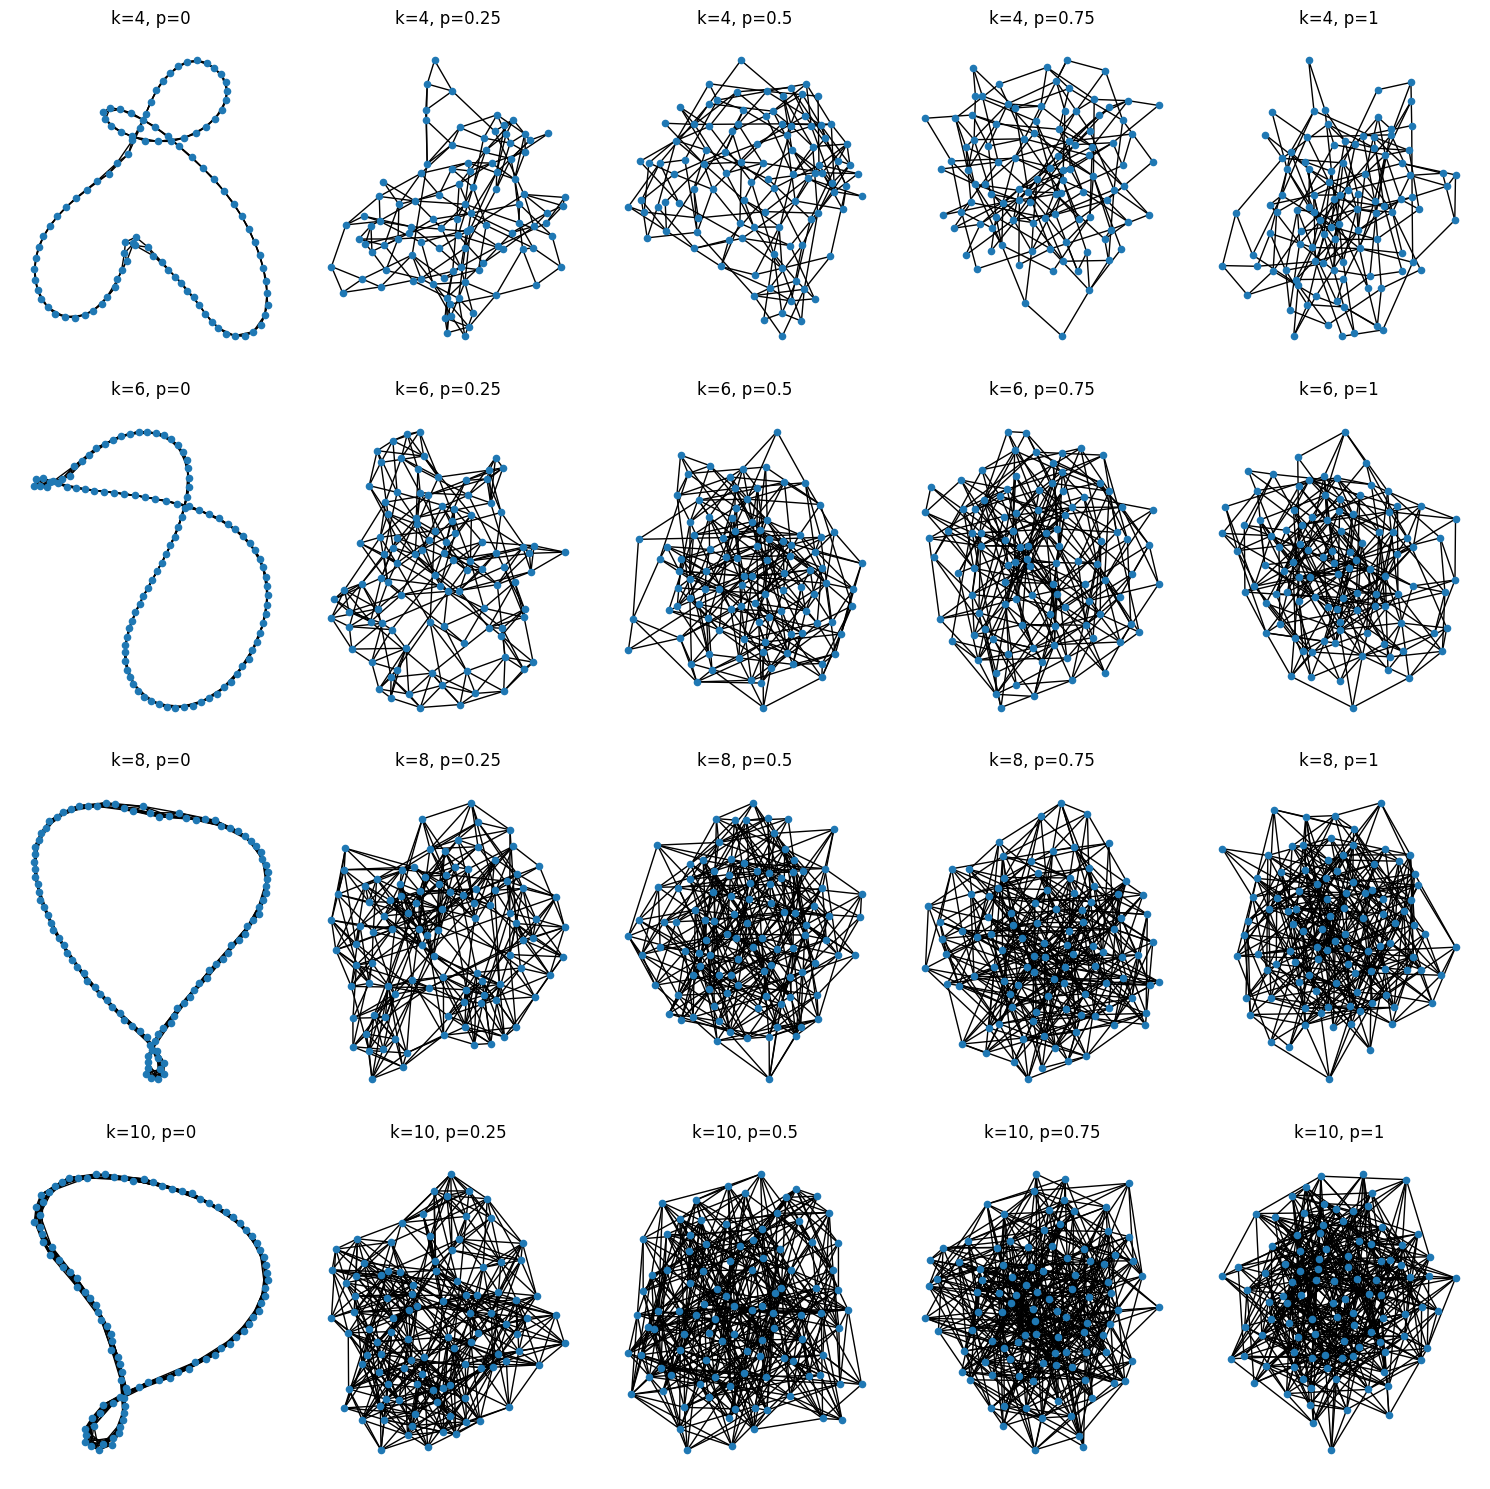

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")  # Ignore warnings


n = 100  # Number of nodes
k_values = [4, 6, 8, 10]  # Each node is connected to k nearest neighbors in ring topology
p_values = [0, 0.25, 0.5, 0.75, 1]  # Rewiring probability

# Generate and plot Watts-Strogatz graphs
fig, axes = plt.subplots(len(k_values), len(p_values), figsize=(15, 15))

for i, k in enumerate(k_values):
    for j, p in enumerate(p_values):
        G = nx.watts_strogatz_graph(n, k, p)  # Generate graph
        ax = axes[i, j]
        nx.draw(G, node_size=20, ax=ax)  # Draw graph
        ax.set_title(f'k={k}, p={p}')

plt.tight_layout()
plt.show()


# Plot the clustering coefficient (vs) degree for each of the graphs generated
with spearman’s correlation coefficient

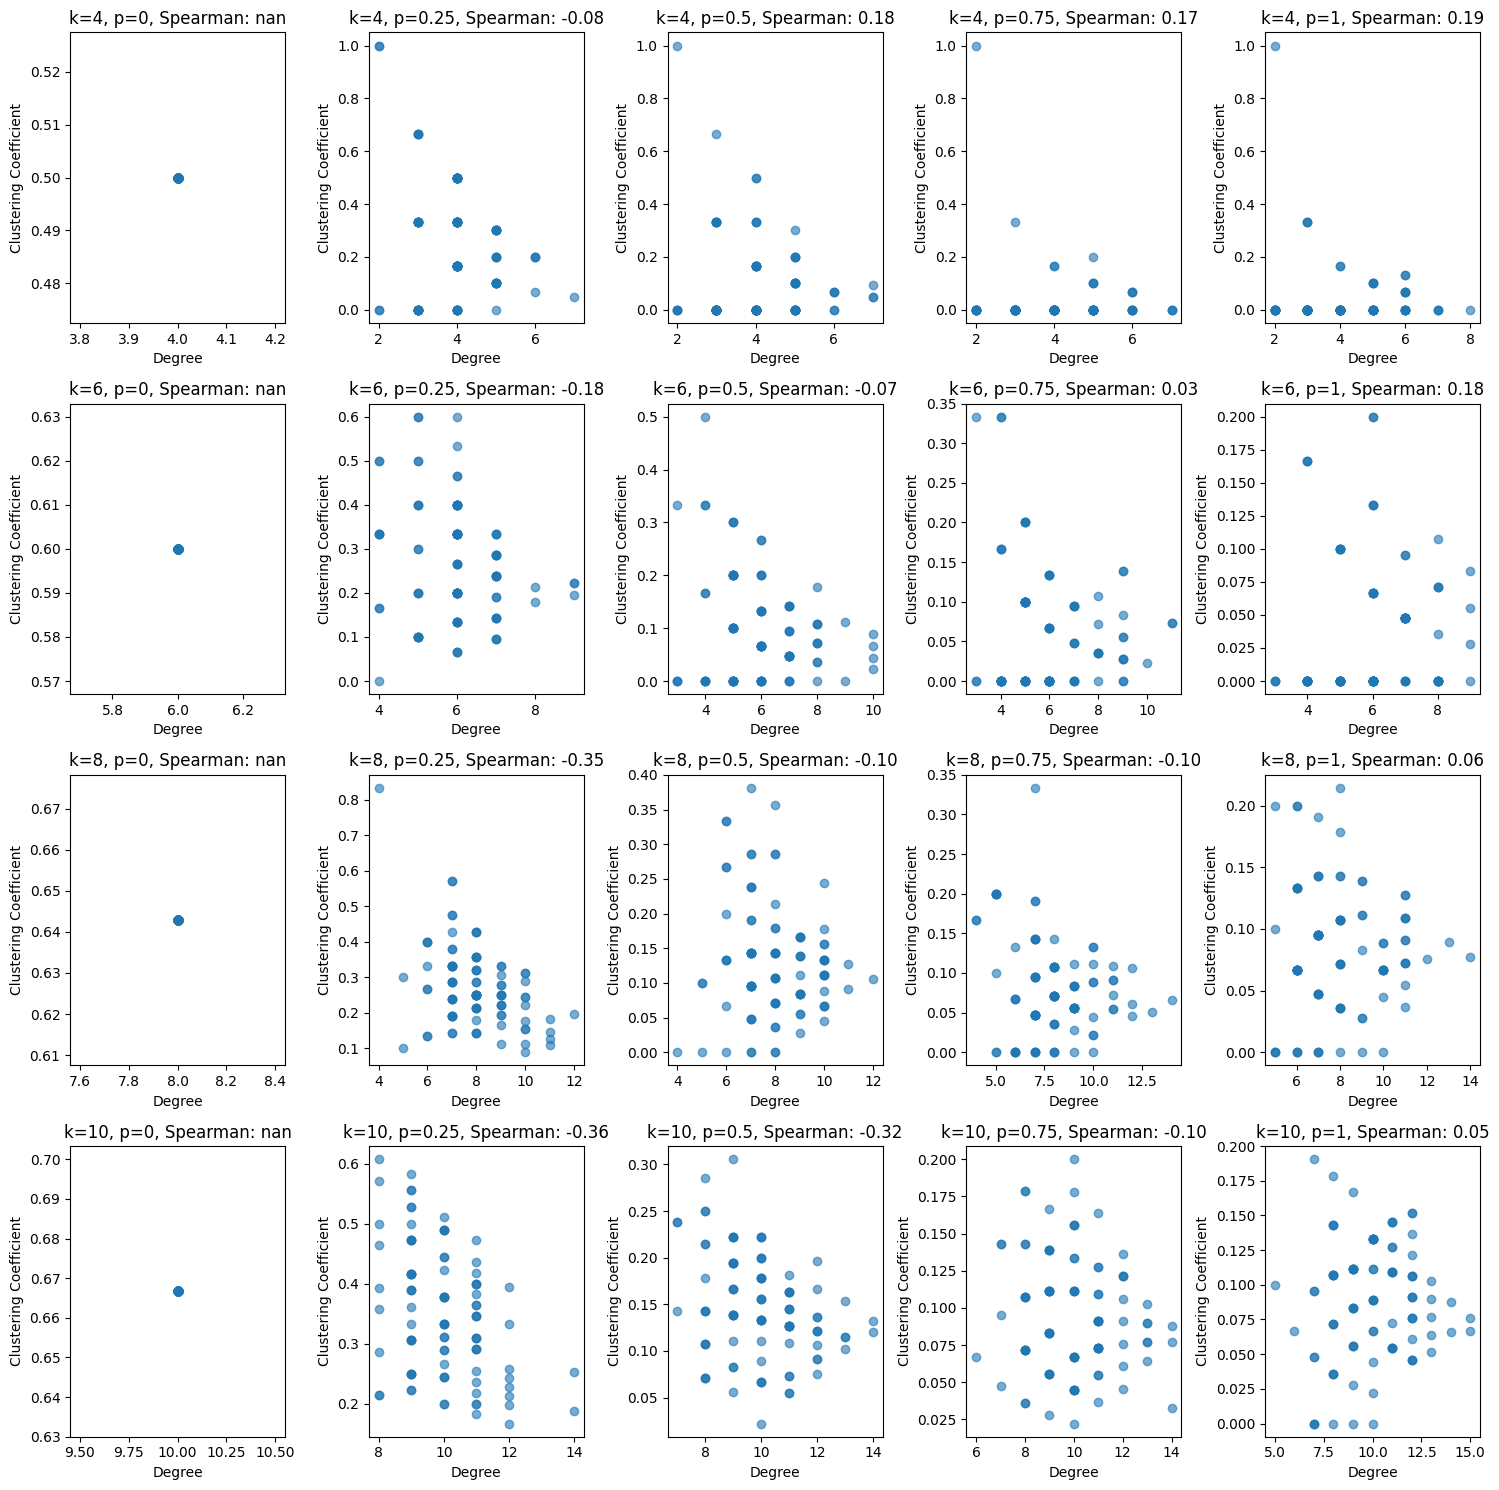

In [3]:
from scipy.stats import spearmanr

# DataFrames to store Spearman's correlation results
df_clustering_vs_degree = pd.DataFrame(columns=['k', 'p', 'spearman'])

fig1, axes1 = plt.subplots(len(k_values), len(p_values), figsize=(15, 15))
for i, k in enumerate(k_values):
    for j, p in enumerate(p_values):
        G = nx.watts_strogatz_graph(n, k, p)  # Generate graph

        # Compute degree and clustering coefficient
        degrees = dict(G.degree())
        clustering_coeffs = nx.clustering(G)

        # Calculate Spearman's correlation coefficient
        spearman_corr, _ = spearmanr(list(degrees.values()), list(clustering_coeffs.values()))
        df_clustering_vs_degree = pd.concat([df_clustering_vs_degree, pd.DataFrame({'k': [k], 'p': [p], 'spearman': [spearman_corr]})], ignore_index=True)

        # Plot clustering coefficient vs degree
        ax1 = axes1[i, j]
        ax1.scatter(degrees.values(), clustering_coeffs.values(), alpha=0.6)
        ax1.set_xlabel("Degree")
        ax1.set_ylabel("Clustering Coefficient")
        ax1.set_title(f'k={k}, p={p}, Spearman: {spearman_corr:.2f}')

plt.tight_layout()
plt.show()


# Plot the betweenness centrality (vs) clustering coefficient for each of the graphs generated.

with spearman’s correlation coefficient

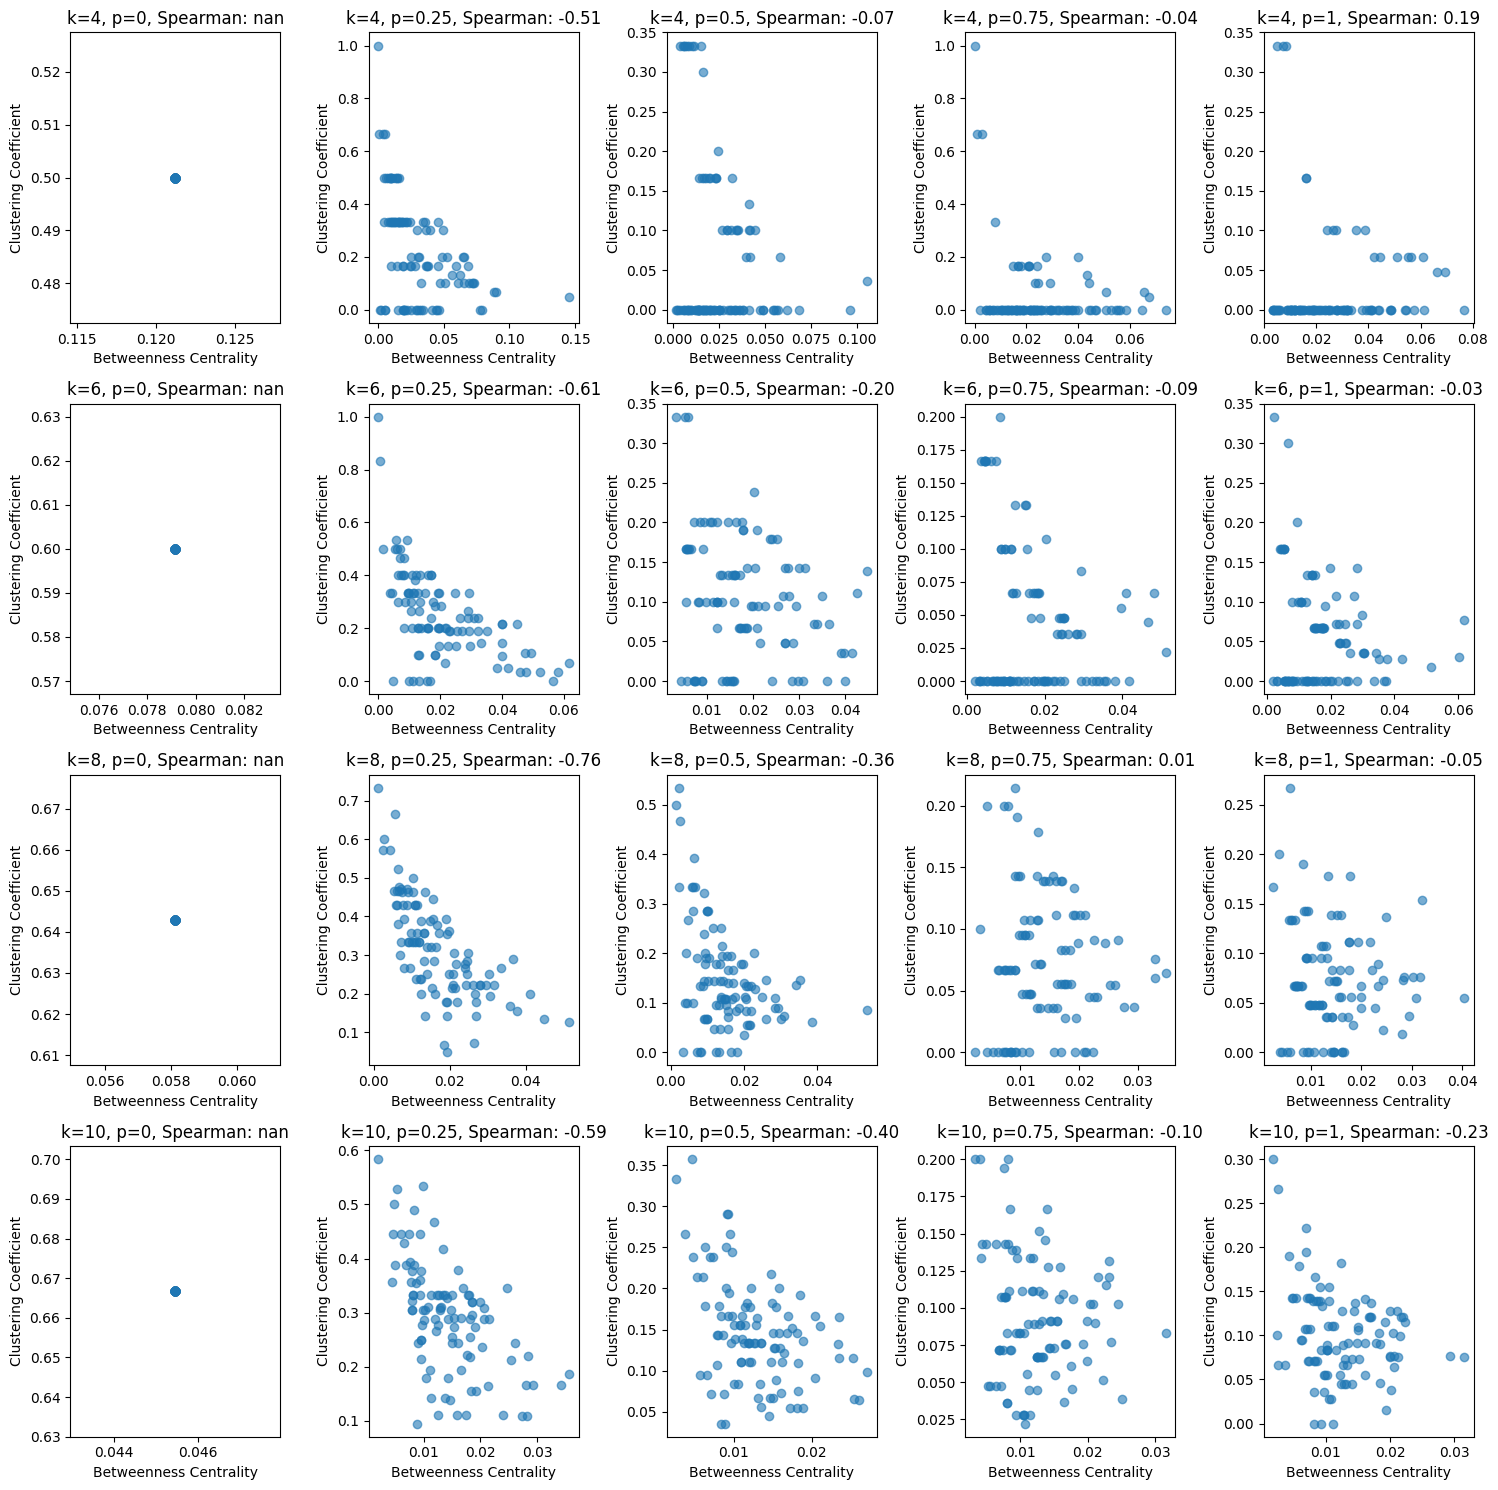

In [4]:
df_betweenness_vs_clustering = pd.DataFrame(columns=['c', 'p', 'spearman'])

# Create subplots for betweenness centrality vs clustering coefficient
fig2, axes2 = plt.subplots(len(k_values), len(p_values), figsize=(15, 15))
for i, k in enumerate(k_values):
    for j, p in enumerate(p_values):
        G = nx.watts_strogatz_graph(n, k, p)  # Generate graph

        # Compute betweenness centrality and clustering coefficient
        betweenness_centrality = nx.betweenness_centrality(G)
        clustering_coeffs = nx.clustering(G)

        # Calculate Spearman's correlation coefficient
        spearman_corr, _ = spearmanr(list(betweenness_centrality.values()), list(clustering_coeffs.values()))
        df_betweenness_vs_clustering = pd.concat([df_betweenness_vs_clustering, pd.DataFrame({'k': [k], 'p': [p], 'spearman': [spearman_corr]})], ignore_index=True)

        # Plot betweenness centrality vs clustering coefficient
        ax2 = axes2[i, j]
        ax2.scatter(betweenness_centrality.values(), clustering_coeffs.values(), alpha=0.6)
        ax2.set_xlabel("Betweenness Centrality")
        ax2.set_ylabel("Clustering Coefficient")
        ax2.set_title(f'k={k}, p={p}, Spearman: {spearman_corr:.2f}')

plt.tight_layout()
plt.show()

# Analysis and observation

##   clustering coefficient (vs) degree

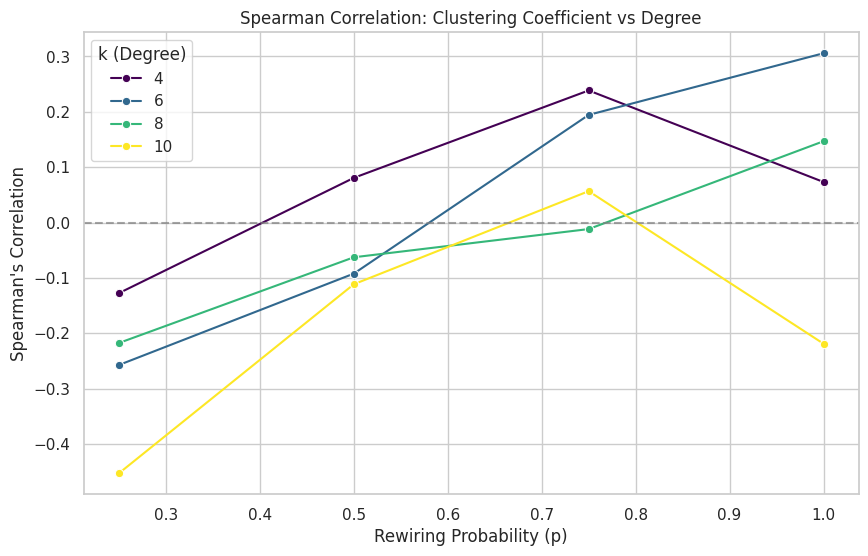

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Plot Spearman correlation for Clustering Coefficient vs Degree
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_clustering_vs_degree, x="p", y="spearman", hue="k", marker="o", palette="viridis")
plt.axhline(0, linestyle="--", color="gray", alpha=0.7)
plt.title("Spearman Correlation: Clustering Coefficient vs Degree")
plt.xlabel("Rewiring Probability (p)")
plt.ylabel("Spearman's Correlation")
plt.legend(title="k (Degree)")
plt.show()

for small p <0.75:

    higher-degree nodes tend to have lower clustering (negative Spearman).
    As p increases, correlation moves towards 0 or positive, as shortcuts improve local clustering.


For high p >0.75:

    Small k 4 and very large k 10 see a drop in correlation.
    Medium k 6,8 values see a continuous increase in correlation.


At p=1 (fully random network):

    k=10: Spearman correlation drops to −0.2−0.2 as hubs dominate, reducing local clustering.
    k=4: Correlation drops to 0.10.1, as randomness disrupts clustering but doesn’t create strong hubs.

Higher k amplifies hub effects, lowering clustering, while lower k retains some local structure.

Mid-range k balances local clustering and randomness, avoiding strong hub effects while maintaining some structure.

##  betweenness centrality (vs) clustering coefficient

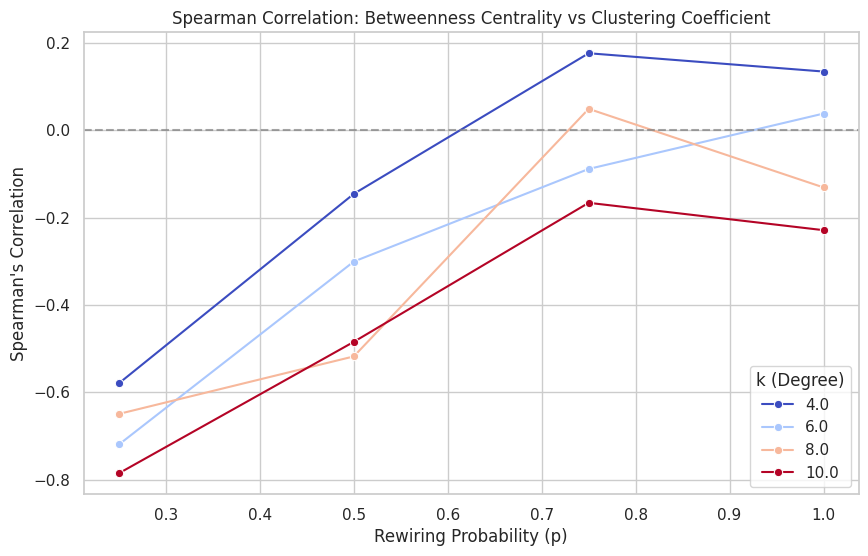

In [33]:

# Plot Spearman correlation for Betweenness Centrality vs Clustering Coefficient
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_betweenness_vs_clustering, x="p", y="spearman", hue="k", marker="o", palette="coolwarm")
plt.axhline(0, linestyle="--", color="gray", alpha=0.7)
plt.title("Spearman Correlation: Betweenness Centrality vs Clustering Coefficient")
plt.xlabel("Rewiring Probability (p)")
plt.ylabel("Spearman's Correlation")
plt.legend(title="k (Degree)")
plt.show()

For small p<0.75:

    Negative Spearman correlation is observed (around -0.8 to -0.4), meaning nodes with high betweenness tend to have low clustering.
    As pp increases, correlation moves towards zero or slightly positive, since rewiring introduces shortcuts.
    Lower kk (e.g., k=4) increases at a steady pace.
    Higher kk (e.g., k=8,10) takes longer to increase but accelerates as more shortcuts appear.

For high p>0.75:

    Correlation slightly drops for all k as randomness disrupts the previous structure.
    k=4,6,8,10 show a decline, though the rate of decrease varies.
    Higher k (e.g., k=8,10) sees an earlier increase but then drops slightly approaching p=1.

At p=1 (fully random network):

    All k values experience a slight drop in correlation.
    k=10,8: Correlation decreases as high-degree nodes dominate, reducing local clustering influence.
    k=4,6: Correlation also declines but remains more stable as clustering and betweenness are more evenly distributed.

General Trend:

    Low k steadily increases up to p=0.75, but higher k initially lags before accelerating.
    After p=0.75, all k values experience a slight drop as randomness weakens clustering-betweenness relationships.
    Higher k amplifies hub effects, leading to a sharper correlation drop after p=0.75.
    Mid-range k balances clustering and betweenness, but randomness introduces variability at high p.